In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler


In [ ]:
import seaborn as sns
sns.set_style("whitegrid")

In [ ]:
noun_sentence_df_final_joined_df_selected_columns_use_mean = pd.\
    read_feather('noun_sentence_df_final_joined_df_selected_columns_use_mean_2.fea')

In [ ]:
noun_sentence_df_final_joined_df_selected_columns_use_min = pd.\
    read_feather('noun_sentence_df_final_joined_df_selected_columns_use_min_2.fea')

In [ ]:
noun_sentence_df_final_joined_df_selected_columns_use = pd.merge(noun_sentence_df_final_joined_df_selected_columns_use_min,
         noun_sentence_df_final_joined_df_selected_columns_use_mean, left_index=True, right_index=True)

In [6]:
len(noun_sentence_df_final_joined_df_selected_columns_use)

599876

In [7]:
noun_sentence_df_final_joined_df_selected_columns_use = noun_sentence_df_final_joined_df_selected_columns_use.dropna()

In [8]:
noun_sentence_df_final_joined_df_selected_columns_use

,level_0,listingid_x,index,AVM_Error_List_x,Listing_Error_List_x,Transdate_x,Transprice_x,total_value_x,cj_living_area_x,effective_year_built_x,...,sentence_composition_0_y,sentence_composition_1_y,sentence_composition_2_y,sentence_composition_3_y,sentence_composition_4_y,sentence_composition_5_y,sentence_composition_6_y,sentence_composition_7_y,sentence_composition_8_y,transaction_year_y
0,2663231,1066,central heat,0.095595,-0.066000,20180111,150000.0,98615.0,925.0,2005.0,...,58.620690,17.241379,13.793103,6.896552,1.724138,1.724138,0.0,58.0,15.0,2018.0
1,1418678,1071,new appliances,-0.038420,-0.018605,20171208,215000.0,143200.0,1730.0,1995.0,...,57.812500,17.187500,18.750000,1.562500,3.125000,0.000000,0.0,64.0,13.0,2017.0
2,1408417,1079,new kitchen cabinets,-0.067666,-0.075000,20180116,240000.0,184190.0,2640.0,2000.0,...,57.894737,15.789474,24.561404,1.754386,0.000000,0.000000,0.0,57.0,16.0,2018.0
3,2913823,1080,modern updates,0.085874,0.000000,20171227,389900.0,324300.0,3092.0,1997.0,...,52.941176,10.294118,30.882353,4.411765,0.000000,0.000000,0.0,68.0,18.0,2017.0
4,3314875,1084,pool pump,-0.152460,0.000000,20180201,214900.0,201300.0,2600.0,1997.0,...,58.666667,10.666667,29.333333,4.000000,0.000000,0.000000,0.0,75.0,21.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599869,2418106,251233929,great investment opportunity,-0.352831,0.064013,20210630,305440.0,242500.0,1930.0,1956.0,...,62.195122,13.414634,23.170732,1.219512,0.000000,0.000000,0.0,82.0,24.0,2021.0
599870,1554528,251237461,large bonus room,0.297356,0.104167,20210629,240000.0,92200.0,1744.0,1989.0,...,50.943396,18.867925,15.094340,7.547170,1.886792,0.000000,0.0,53.0,12.0,2021.0
599871,3091817,251262429,great rental property,-0.359648,0.132275,20210630,94500.0,52978.0,1236.0,2000.0,...,68.852459,6.557377,22.950820,1.639344,0.000000,0.000000,0.0,61.0,18.0,2021.0
599874,2592650,251452095,perkerson park,-0.011109,0.064987,20210624,560420.0,436500.0,1854.0,2004.0,...,56.000000,16.000000,16.000000,8.000000,4.000000,0.000000,0.0,50.0,12.0,2021.0


In [9]:
noun_sentence_df_final_joined_df_selected_columns_use.columns

Index(['level_0', 'listingid_x', 'index', 'AVM_Error_List_x',
       'Listing_Error_List_x', 'Transdate_x', 'Transprice_x', 'total_value_x',
       'cj_living_area_x', 'effective_year_built_x',
       ...
       'sentence_composition_0_y', 'sentence_composition_1_y',
       'sentence_composition_2_y', 'sentence_composition_3_y',
       'sentence_composition_4_y', 'sentence_composition_5_y',
       'sentence_composition_6_y', 'sentence_composition_7_y',
       'sentence_composition_8_y', 'transaction_year_y'],
      dtype='object', length=1130)

In [21]:
predictor_columns = ['cj_living_area_x', 'story_x', 'avmValue_x','bedrooms_x']

In [22]:
columns_selected = noun_sentence_df_final_joined_df_selected_columns_use.columns[\
                         pd.Series(noun_sentence_df_final_joined_df_selected_columns_use.columns).str.\
                        startswith('AVM_Error_Indicators')]
predictor_columns = predictor_columns + list(columns_selected)

columns_selected = noun_sentence_df_final_joined_df_selected_columns_use.columns[\
                                pd.Series(noun_sentence_df_final_joined_df_selected_columns_use.columns).str.\
                                                        startswith('Listing_Error_Indicators')]
predictor_columns = predictor_columns + list(columns_selected)



In [23]:
predictor_columns


['cj_living_area_x',
 'story_x',
 'avmValue_x',
 'bedrooms_x',
 'AVM_Error_Indicators_0_x',
 'AVM_Error_Indicators_1_x',
 'AVM_Error_Indicators_2_x',
 'AVM_Error_Indicators_3_x',
 'AVM_Error_Indicators_4_x',
 'AVM_Error_Indicators_5_x',
 'AVM_Error_Indicators_6_x',
 'AVM_Error_Indicators_7_x',
 'AVM_Error_Indicators_8_x',
 'AVM_Error_Indicators_9_x',
 'AVM_Error_Indicators_10_x',
 'AVM_Error_Indicators_11_x',
 'AVM_Error_Indicators_scale_x',
 'AVM_Error_Indicators_0_y',
 'AVM_Error_Indicators_1_y',
 'AVM_Error_Indicators_2_y',
 'AVM_Error_Indicators_3_y',
 'AVM_Error_Indicators_4_y',
 'AVM_Error_Indicators_5_y',
 'AVM_Error_Indicators_6_y',
 'AVM_Error_Indicators_7_y',
 'AVM_Error_Indicators_8_y',
 'AVM_Error_Indicators_9_y',
 'AVM_Error_Indicators_10_y',
 'AVM_Error_Indicators_11_y',
 'AVM_Error_Indicators_scale_y',
 'Listing_Error_Indicators_0_x',
 'Listing_Error_Indicators_1_x',
 'Listing_Error_Indicators_2_x',
 'Listing_Error_Indicators_3_x',
 'Listing_Error_Indicators_4_x',
 'List

In [62]:
predictor_columns = [ 'AVM_Error_Indicators_7_x',
 'AVM_Error_Indicators_1_y',
 'cj_living_area_x',
 'AVM_Error_Indicators_7_y',
 'AVM_Error_Indicators_10_x',
 'AVM_Error_Indicators_4_y',
 'AVM_Error_Indicators_4_x',
 'AVM_Error_Indicators_11_x',
 'AVM_Error_Indicators_11_y',
 'AVM_Error_Indicators_5_x',
 'AVM_Error_Indicators_10_y',
 'AVM_Error_Indicators_6_x',
 'AVM_Error_Indicators_0_x',
 'AVM_Error_Indicators_6_y',
 'AVM_Error_Indicators_5_y',
 'AVM_Error_Indicators_0_y',
 'avmValue_x']

In [63]:
noun_sentence_df_final_joined_df_selected_columns_use.columns

Index(['level_0', 'listingid_x', 'index', 'AVM_Error_List_x',
       'Listing_Error_List_x', 'Transdate_x', 'Transprice_x', 'total_value_x',
       'cj_living_area_x', 'effective_year_built_x',
       ...
       'sentence_composition_0_y', 'sentence_composition_1_y',
       'sentence_composition_2_y', 'sentence_composition_3_y',
       'sentence_composition_4_y', 'sentence_composition_5_y',
       'sentence_composition_6_y', 'sentence_composition_7_y',
       'sentence_composition_8_y', 'transaction_year_y'],
      dtype='object', length=1130)

In [64]:
Predictors = noun_sentence_df_final_joined_df_selected_columns_use[predictor_columns].to_numpy()

In [65]:
Predictors.shape

(517822, 17)

In [66]:
predictand = noun_sentence_df_final_joined_df_selected_columns_use.avmerror_x.values

In [67]:
predictand.shape

(517822,)

In [68]:
train_samples = 200000  # Samples used for training the models
X_train, X_test, y_train, y_test = train_test_split(
    Predictors,
    predictand,
    shuffle=False,
    test_size=len(Predictors) - train_samples,
)

In [69]:
np.max(X_train)

5233111.71

In [148]:
model = RandomForestRegressor(n_estimators = 10,  min_samples_leaf=30, 
                              max_features = 6, max_depth=40
                              )

#model = RandomForestRegressor()
                              


In [149]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=40, max_features=6, min_samples_leaf=30,
                      n_estimators=10)

In [150]:
print(model.get_params(deep=True))

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 40, 'max_features': 6, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 30, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [151]:
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

In [152]:
y_train.min()

-1.4926238888888888

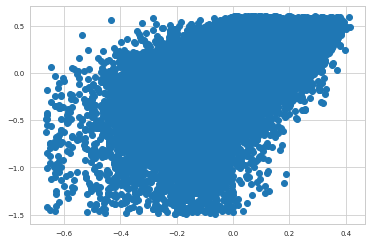

In [153]:
plt.plot(predictions_train,y_train,'o')

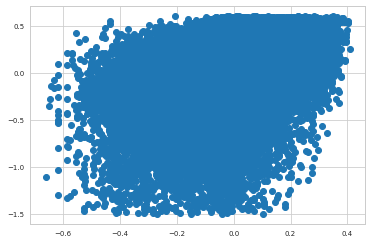

In [154]:
plt.plot(predictions_test,y_test,'o')

In [155]:
df = noun_sentence_df_final_joined_df_selected_columns_use.copy()


In [156]:
predictions_test_value = df['avmValue_x'].values[train_samples:]/(1-predictions_test)
predictions_train_value = df['avmValue_x'].values[:train_samples]/(1-predictions_train)
#predictions_train_value = df['avmValue'].values/(1-Predictors)

In [157]:
df.columns

Index(['level_0', 'listingid_x', 'index', 'AVM_Error_List_x',
       'Listing_Error_List_x', 'Transdate_x', 'Transprice_x', 'total_value_x',
       'cj_living_area_x', 'effective_year_built_x',
       ...
       'sentence_composition_0_y', 'sentence_composition_1_y',
       'sentence_composition_2_y', 'sentence_composition_3_y',
       'sentence_composition_4_y', 'sentence_composition_5_y',
       'sentence_composition_6_y', 'sentence_composition_7_y',
       'sentence_composition_8_y', 'transaction_year_y'],
      dtype='object', length=1130)

In [158]:
print(np.mean(np.abs(df['Transprice_x'].values[:train_samples]-predictions_train_value)/\
              (df['Transprice_x'].values[:train_samples])))
print(np.mean(np.abs(df['Transprice_x'].values[:train_samples]- df['avmValue_x'].values[:train_samples])/\
              (df['Transprice_x'].values[:train_samples])))


0.10773206926790599
0.12487725017106194


In [159]:
print(np.mean(np.abs(df['Transprice_x'].values[train_samples:]-predictions_test_value)/\
              (df['Transprice_x'].values[train_samples:])))
print(np.mean(np.abs(df['Transprice_x'].values[train_samples:]- df['avmValue_x'].values[train_samples:])/\
              (df['Transprice_x'].values[train_samples:])))


0.11899381901562606
0.12531334435944558


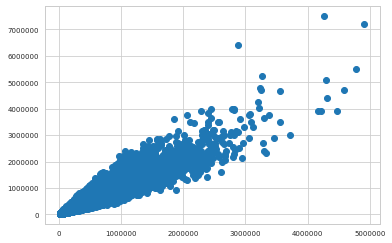

In [147]:
plt.plot(predictions_train_value,df['Transprice_x'].values[:train_samples],'o')

In [60]:
df.columns

Index(['level_0', 'listingid_x', 'index', 'AVM_Error_List_x',
       'Listing_Error_List_x', 'Transdate_x', 'Transprice_x', 'total_value_x',
       'cj_living_area_x', 'effective_year_built_x',
       ...
       'sentence_composition_0_y', 'sentence_composition_1_y',
       'sentence_composition_2_y', 'sentence_composition_3_y',
       'sentence_composition_4_y', 'sentence_composition_5_y',
       'sentence_composition_6_y', 'sentence_composition_7_y',
       'sentence_composition_8_y', 'transaction_year_y'],
      dtype='object', length=1130)

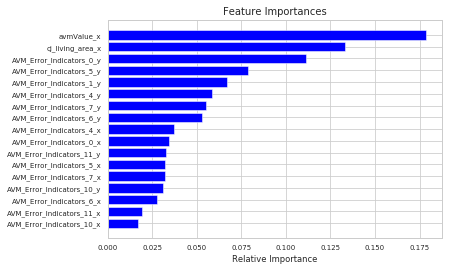

In [84]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = predictor_columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = predictor_columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [45]:
[features[i] for i in indices]

['Listing_Error_Indicators_7_x',
 'bedrooms_x',
 'Listing_Error_Indicators_10_x',
 'Listing_Error_Indicators_7_y',
 'Listing_Error_Indicators_9_x',
 'Listing_Error_Indicators_2_x',
 'Listing_Error_Indicators_11_x',
 'Listing_Error_Indicators_6_x',
 'Listing_Error_Indicators_3_x',
 'AVM_Error_Indicators_9_x',
 'story_x',
 'Listing_Error_Indicators_11_y',
 'Listing_Error_Indicators_3_y',
 'Listing_Error_Indicators_2_y',
 'Listing_Error_Indicators_10_y',
 'Listing_Error_Indicators_0_x',
 'AVM_Error_Indicators_scale_y',
 'Listing_Error_Indicators_6_y',
 'Listing_Error_Indicators_8_x',
 'AVM_Error_Indicators_9_y',
 'Listing_Error_Indicators_9_y',
 'Listing_Error_Indicators_8_y',
 'Listing_Error_Indicators_5_y',
 'AVM_Error_Indicators_3_x',
 'AVM_Error_Indicators_3_y',
 'Listing_Error_Indicators_5_x',
 'Listing_Error_Indicators_0_y',
 'Listing_Error_Indicators_4_x',
 'AVM_Error_Indicators_2_x',
 'Listing_Error_Indicators_4_y',
 'AVM_Error_Indicators_8_x',
 'AVM_Error_Indicators_8_y',
 'AVM_E

In [ ]:
import joblib
filename = 'RF_newmodel_03_newset.sav'
joblib.dump(model,filename)